In [38]:
import pandas as pd
import numpy as np

In [89]:
df = pd.read_csv("homepage-experiment-data.csv")
df.head()

,Day,Control Cookies,Control Downloads,Control Licenses,Experiment Cookies,Experiment Downloads,Experiment Licenses
0,1,1764,246,1,1850,339,3
1,2,1541,234,2,1590,281,2
2,3,1457,240,1,1515,274,1
3,4,1587,224,1,1541,284,2
4,5,1606,253,2,1643,292,3


<AxesSubplot:ylabel='Frequency'>

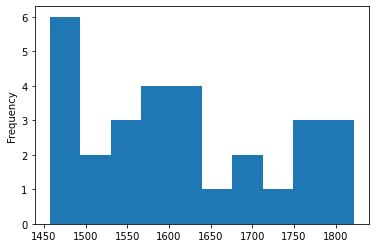

In [40]:
df["Control Cookies"].plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

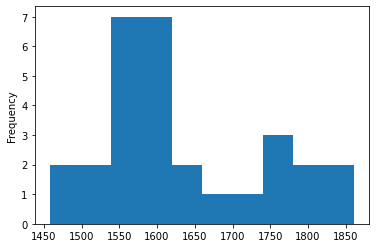

In [41]:
df["Experiment Cookies"].plot(kind="hist")

## Invariant Metric Calculation

In [42]:
total_cookies = df["Experiment Cookies"].sum()+df["Control Cookies"].sum()
total_cookies

94197

In [44]:
p = 0.5
mean = total_cookies * p 

sd = np.sqrt(p * (1-p) * total_cookies)
mean,sd

(47098.5, 153.4576488807254)

In [45]:
z = (df["Control Cookies"].sum()+0.5 - mean)/sd
z

-1.6095646049678511

In [47]:
#P(z_score < sample_mean) + P(z_score > sample_mean)
stats.norm.cdf(z) + stats.norm.sf(-z)

0.10749294050130412

In [5]:
from statsmodels.stats.weightstats import ttest_ind

ttest_ind(df["Control Cookies"],df["Experiment Cookies"])

(-0.5667703149522241, 0.573135021792267, 56.0)

In [8]:
df["Experiment Cookies"].sum() -  df["Control Cookies"].sum()

495

In [9]:
sd = df["Control Cookies"].std()

In [15]:
z = (df["Experiment Cookies"].mean() -  df["Control Cookies"].mean())/sd
z

0.14675625173179058

In [19]:
import scipy.stats as stats
stats.norm.cdf(-z) + stats.norm.sf(z)

0.8833244167648931

## Evaluation Metric

### Download Rate

In [50]:
p_control = df["Control Downloads"].sum()/df["Control Cookies"].sum()
p_control

0.16123455209067042

In [51]:
p_experiment = df["Experiment Downloads"].sum()/df["Experiment Cookies"].sum()
p_experiment

0.180543234908968

In [52]:
p_control - p_experiment

-0.01930868281829759

In [53]:
p_null = (df["Control Downloads"].sum() + \
          df["Experiment Downloads"].sum())/(df["Control Cookies"].sum()+\
                                             df["Experiment Cookies"].sum())
p_null

0.1709396265273841

In [56]:
n_c,n_e = df["Control Cookies"].sum(), df["Experiment Cookies"].sum()
z_score = (p_experiment - p_control)/np.sqrt(p_null*(1-p_null)*(1/n_c + 1/n_e))
z_score

7.870833726066236

In [57]:
stats.norm.sf(z_score)

1.7614279636728079e-15

### Licence Rate

In [82]:
df = df.loc[df["Day"]<21]

In [97]:
p_control = df["Control Licenses"].sum()/df.loc[df["Day"]<=21]["Control Cookies"].sum()
p_control

0.021032051661828307

In [98]:
p_experiment = df["Experiment Licenses"].sum()/df.loc[df["Day"]<=21]["Experiment Cookies"].sum()
p_experiment

0.021317490826489604

In [99]:
p_experiment - p_control 

0.00028543916466129693

In [100]:
p_null = (df["Control Licenses"].sum() + \
          df["Experiment Licenses"].sum())/(df.loc[df["Day"]<=21]["Control Cookies"].sum()+\
                                             df.loc[df["Day"]<=21]["Experiment Cookies"].sum())
p_null

0.021175986842105265

In [101]:
n_c,n_e = df.loc[df["Day"]<=21]["Control Cookies"].sum(), df.loc[df["Day"]<=21]["Experiment Cookies"].sum()
z_score = (p_experiment - p_control)/np.sqrt(p_null*(1-p_null)*(1/n_c + 1/n_e))
z_score

0.2586750111658684

In [102]:
stats.norm.sf(z_score)

0.3979430008399871